In [1]:
import numpy as np
import pandas as pd

In [2]:
import os

In [3]:
os.chdir("C:/Users/abhis/Downloads")

In [4]:
data=pd.read_csv("dc-wikia-data.csv")

In [6]:
data.shape

(6896, 13)

In [7]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [8]:
data=pd.read_csv("seeds.csv")

In [9]:
data.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
Area               199 non-null float64
Perimeter          199 non-null float64
Compactness        199 non-null float64
Kernel.Length      199 non-null float64
Kernel.Width       199 non-null float64
Asymmetry.Coeff    199 non-null float64
Kernel.Groove      199 non-null float64
Type               199 non-null int64
dtypes: float64(7), int64(1)
memory usage: 12.5 KB


In [14]:
for i in data.columns:
    print(i,data[i].nunique())

Area 186
Perimeter 163
Compactness 177
Kernel.Length 179
Kernel.Width 177
Asymmetry.Coeff 197
Kernel.Groove 142
Type 3


In [26]:
s=[]
for i in data.columns:
    if np.dtype(data[i]).name=="float64":
        s.append(i)
        
        

In [27]:
s

['Area',
 'Perimeter',
 'Compactness',
 'Kernel.Length',
 'Kernel.Width',
 'Asymmetry.Coeff',
 'Kernel.Groove']

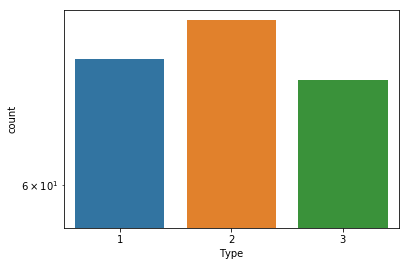

In [29]:
plt.semilogy()
sns.countplot(data.Type)

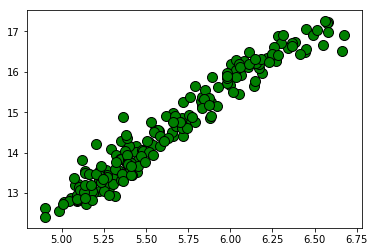

In [42]:
plt.scatter(data["Kernel.Length"],data.Perimeter,edgecolors="black",s=25*4,c="green")

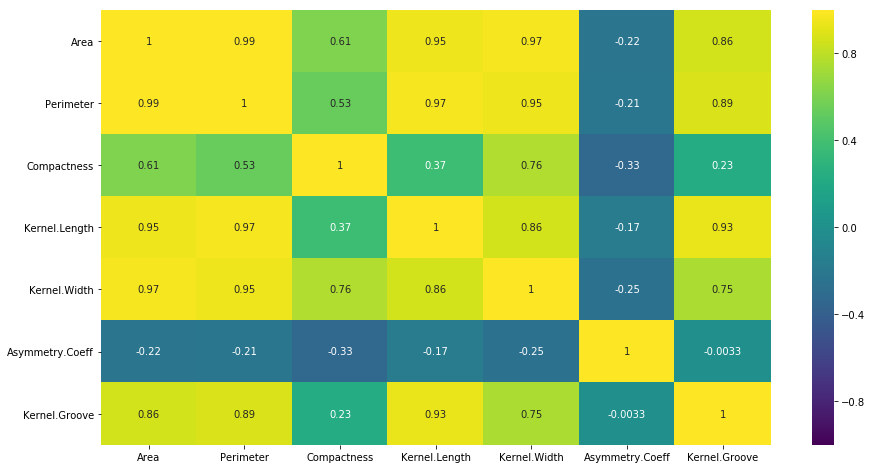

In [40]:
plt.figure(figsize=[15,8])
sns.heatmap(data.drop("Type",axis=1).corr(),cmap="viridis",annot=True,vmin=-1,vmax=1)


In [43]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,AgglomerativeClustering


In [52]:
pca=PCA(n_components=6)
x_pca=pca.fit_transform(data.drop("Type",axis=1))

In [51]:
np.cumsum(pca.explained_variance_ratio_)

array([0.83532627, 0.9930021 , 0.99868236, 0.99966365, 0.9998758 ,
       0.99999775, 1.        ])

In [54]:
x_pca.shape

(199, 6)

In [67]:
kmeans=KMeans(n_clusters=3)

In [79]:
clus=kmeans.fit_predict(x_pca)

In [80]:
clus

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [70]:
plt.scatter(data['kernel.length'],data["Compactness"],c=clus)
plt.scatter(centres[:,0],centres[:,1],marker="d",s=90,c="red")

TypeError: scatter() missing 1 required positional argument: 'y'

In [73]:
centres=kmeans.cluster_centers_

In [74]:
centres

array([[14.61128571, 14.44842857,  0.87843571,  5.56281429,  3.27052857,
         2.75750286,  5.17861429,  1.12857143],
       [11.92550725, 13.26391304,  0.85095797,  5.23184058,  2.86415942,
         4.72671014,  5.10688406,  2.88405797],
       [18.71966667, 16.2995    ,  0.884745  ,  6.20988333,  3.72128333,
         3.61626667,  6.06386667,  1.98333333]])

In [81]:
kmeans.inertia_

547.1006184958079

In [82]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit_predict(data)
    wcss.append(kmeans.inertia_)

In [83]:
wcss

[2703.1897038951756,
 1064.8439573576452,
 580.3023326633427,
 467.7975502640435,
 402.6281901830417,
 346.0581629721263,
 284.49029241916355,
 253.5507758118329,
 228.60304774582653,
 215.27963886765036]

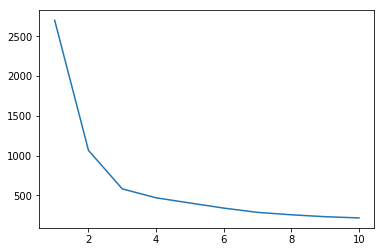

In [63]:
plt.plot(range(1,11),wcss)

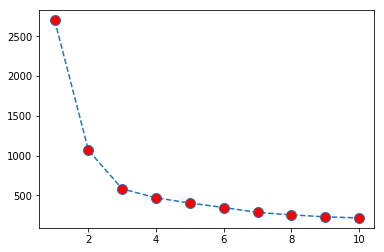

In [84]:
plt.plot(range(1,11),wcss,"o-",linestyle="dashed",markerfacecolor="red",markersize=10)

In [75]:
from sklearn.metrics import adjusted_rand_score,silhouette_score

In [85]:
adjusted_rand_score(data.Type,clus)

0.7402708078803767

In [86]:
silhouette_score(data,clus)

0.48791172293337465

In [91]:
x=pd.DataFrame(x_pca)
y=data.Type

In [ ]:
pd.D

In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=100)

In [93]:
xtrain = xtrain.values
xvalidation = xtest.values
ytrain = ytrain.values
yvalidation = ytest.values

In [95]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', xtrain.shape, xvalidation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', ytrain.shape, yvalidation.shape)

X_shapes:
 X_train: X_validation:
 (139, 6) (60, 6) 

Y_shapes:
 Y_train: Y_validation:
 (139,) (60,)


In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
lr=LogisticRegression()

In [103]:

lr.fit(xtrain, ytrain)
print("Score: ", lr.score(xtest,ytest))

Score:  0.95


C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [105]:
y_predicted1 = np.array(lr.predict(xtest))
y_right1 = np.array(ytest)


In [112]:
y_predicted1

array([2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 1, 1, 2,
       1, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3,
       2, 1, 2, 1, 1, 3, 1, 3, 2, 1, 1, 1, 3, 3, 3, 3], dtype=int64)

In [107]:
y_right1

array([2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 1, 1, 2,
       1, 1, 2, 2, 3, 2, 3, 2, 2, 1, 3, 3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3,
       1, 1, 2, 1, 1, 3, 1, 3, 2, 1, 1, 1, 3, 3, 3, 3], dtype=int64)

In [113]:
from pandas_ml import ConfusionMatrix

In [110]:
! pip install pandas_ml

Confusion matrix:
Predicted   1   2   3  __all__
Actual                        
1          12   2   1       15
2           0  21   0       21
3           0   0  24       24
__all__    12  23  25       60


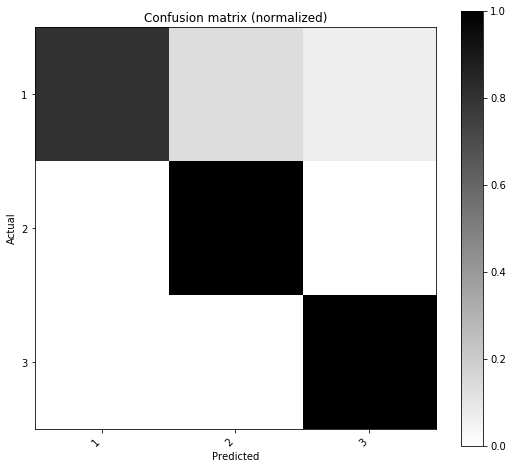

C:\Users\abhis\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
C:\Users\abhis\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:330: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


Confusion Matrix:

Predicted   1   2   3  __all__
Actual                        
1          12   2   1       15
2           0  21   0       21
3           0   0  24       24
__all__    12  23  25       60


Overall Statistics:

Accuracy: 0.95
95% CI: (0.8607567532789272, 0.9895676703556517)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.5001152704043446e-18
Kappa: 0.9229781771501925
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       1          2          3
Population                                   60         60         60
P: Condition positive                        15         21         24
N: Condition negative                        45         39         36
Test outcome positive                        12         23         25
Test outcome negative                        48         37         35
TP: True Positive                            12         21         24
TN: True Negative                            45         37         35
FP

C:\Users\abhis\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:344: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.LRP) / self.LRN)


In [114]:
confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
confusion_matrix1.plot(normalized=True)
plt.show()
confusion_matrix1.print_stats()

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [117]:
xgb=XGBClassifier()

In [119]:
from sklearn.ensemble import BaggingClassifier
bgc=BaggingClassifier()

In [120]:
predict_bgc=bgc.fit(xtrain,ytrain).predict(xtest)

In [121]:
predict_bgc

array([2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 1, 1, 2,
       1, 1, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3,
       2, 1, 2, 1, 1, 3, 1, 3, 2, 1, 3, 1, 3, 3, 3, 3], dtype=int64)

In [122]:
y_predicted1=predict_bgc

Confusion matrix:
Predicted   1   2   3  __all__
Actual                        
1          12   1   2       15
2           0  21   0       21
3           0   0  24       24
__all__    12  22  26       60


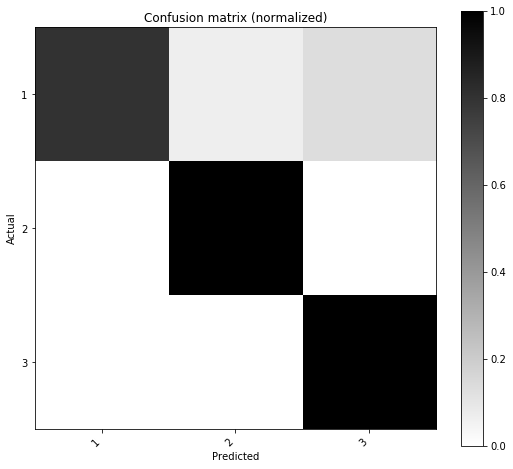

Confusion Matrix:

Predicted   1   2   3  __all__
Actual                        
1          12   1   2       15
2           0  21   0       21
3           0   0  24       24
__all__    12  22  26       60


Overall Statistics:

Accuracy: 0.95
95% CI: (0.8607567532789272, 0.9895676703556517)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.2894458526437222e-17
Kappa: 0.9228791773778919
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                       1          2          3
Population                                   60         60         60
P: Condition positive                        15         21         24
N: Condition negative                        45         39         36
Test outcome positive                        12         22         26
Test outcome negative                        48         38         34
TP: True Positive                            12         21         24
TN: True Negative                            45         38         34
FP

C:\Users\abhis\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
C:\Users\abhis\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:330: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)
C:\Users\abhis\Anaconda3\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:344: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.LRP) / self.LRN)


In [123]:
confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
confusion_matrix1.plot(normalized=True)
plt.show()
confusion_matrix1.print_stats()

In [124]:
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [125]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [126]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [127]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [128]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [129]:
pred_rf=rf.fit(xtrain,ytrain).predict(xtest)

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [131]:
from sklearn.metrics import accuracy_score,cohen_kappa_score

In [132]:
accuracy_score(ytest,pred_rf)

0.9166666666666666

In [130]:
rf_random.fit(xtrain,ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   55.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [133]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [140]:
rf=RandomForestClassifier(n_estimators="warn",min_samples_split=5,min_samples_leaf=4,max_depth=80,max_features='auto',bootstrap=True)

In [141]:
prediction=rf.fit(xtrain,ytrain).predict(xtest)

C:\Users\abhis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [142]:
accuracy_score(ytest,prediction)

0.9333333333333333

In [143]:
accuracy_score(ytest,predict_bgc)

0.95

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [144]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [145]:
grid_search.fit(xtrain,ytrain)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   56.9s finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [146]:
predict_grid=grid_search.fit(xtrain,ytrain).predict(xtest)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   58.9s finished


In [147]:
accuracy_score(ytest,predict_grid)

0.95